In [3]:
#-------BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.----------
#import the required libraries
#Import the libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
train_df = pd.read_csv("termdeposit_train.csv")
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
test_df=pd.read_csv("termdeposit_test.csv")
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [10]:
train_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [12]:
test_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

From the above result of columns we can see that the train_df and test_df have a match with the column names , where as in train_df we have a column name subscribed[target variable]

In [13]:
#check with datatypes 
train_df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [14]:
test_df.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [17]:
train_df.sample(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
20863,41267,33,management,married,secondary,no,369,no,no,cellular,25,aug,83,1,92,3,failure,no
30778,24453,35,technician,married,secondary,no,0,yes,yes,cellular,17,nov,199,1,-1,0,unknown,no
25178,17827,58,housemaid,divorced,primary,no,3858,no,no,telephone,29,jul,53,6,-1,0,unknown,no
17271,44644,75,retired,married,primary,no,1413,no,no,cellular,1,sep,532,2,188,2,success,yes
367,1306,40,technician,married,secondary,no,697,yes,no,unknown,8,may,111,1,-1,0,unknown,no
25882,5658,43,blue-collar,married,secondary,no,470,yes,yes,unknown,26,may,185,1,-1,0,unknown,no
12496,8537,30,blue-collar,single,secondary,no,855,yes,no,unknown,3,jun,235,2,-1,0,unknown,no
5273,12679,33,management,married,secondary,no,4385,no,yes,cellular,4,jul,92,1,-1,0,unknown,no
8144,41477,35,self-employed,single,tertiary,no,44,no,no,cellular,7,sep,310,2,96,2,other,no
7278,19125,60,retired,married,secondary,no,0,no,no,cellular,5,aug,143,3,-1,0,unknown,no


from the above result , the datatypes and the respected columns have a correct match, so there is no need of any typecasting.

In [22]:
train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [23]:
train_df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [20]:
#check the size of the datasets
train_df.shape

(31647, 18)

In [21]:
test_df.shape

(13564, 17)

From the above result we can see that 17 columns are similar and 1 column in train_df[subscribed] will be the target variable

In [24]:
#To check with the null values
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [25]:
test_df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

From the above result we can see that there are no null values present in both the dataset

In [27]:
train_df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [28]:
train_df.describe(include=['O'])  # from categorical columns

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,31647,31647,31647,31647,31647,31647,31647,31647,31647,31647
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,6842,19095,16224,31062,17584,26516,20423,9669,25929,27932


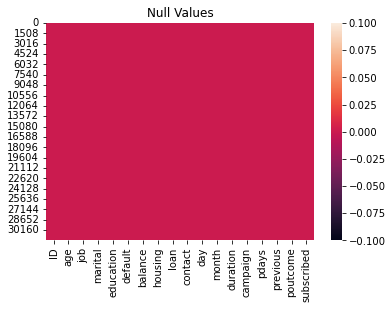

In [30]:
sns.heatmap(train_df.isnull())  #plot to show there are no null values present
plt.title("Null Values")
plt.show()

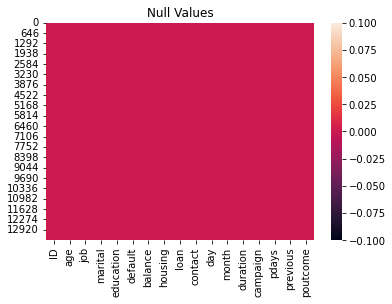

In [31]:
sns.heatmap(test_df.isnull())  #plot to show there are no null values present
plt.title("Null Values")
plt.show()

From the above result we can see that there are no null values in both the datasets

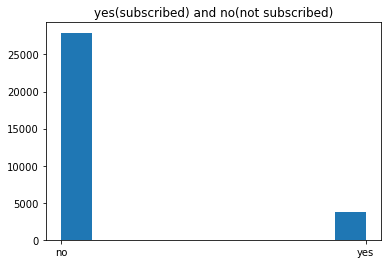

In [33]:
#Taget variable
train_df['subscribed'].hist(grid=False)
plt.title("yes(subscribed) and no(not subscribed)")
plt.show()

In [34]:
train_df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [36]:
train_df.shape

(31647, 18)

In [35]:
train_df['subscribed'].value_counts(normalize=True)*100

no     88.261131
yes    11.738869
Name: subscribed, dtype: float64

From the above analysis we can see that only 3715 people have subscribed out of total 31647 , which is approx only 12%

# Univariate Analysis

In [37]:
train_df.sample(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1984,6417,42,blue-collar,married,secondary,no,68,yes,no,unknown,27,may,198,1,-1,0,unknown,no
21266,40592,34,technician,married,secondary,no,603,yes,no,cellular,28,jul,51,4,434,1,failure,no
14684,41304,57,management,divorced,unknown,no,854,no,no,cellular,27,aug,700,4,92,1,failure,yes
3323,14899,47,blue-collar,divorced,secondary,no,25,no,yes,cellular,16,jul,81,6,-1,0,unknown,no
18616,37385,27,services,single,secondary,no,223,yes,yes,cellular,13,may,297,2,-1,0,unknown,no
18273,24715,50,technician,married,secondary,no,0,yes,no,cellular,17,nov,114,4,168,2,failure,no
15711,13880,34,management,married,tertiary,no,580,yes,no,cellular,10,jul,380,1,-1,0,unknown,no
14793,29742,36,technician,single,secondary,no,1855,yes,no,cellular,4,feb,75,1,273,1,failure,no
3432,42347,24,blue-collar,single,primary,no,1033,yes,no,cellular,24,nov,283,1,-1,0,unknown,no
20467,23423,37,technician,married,secondary,no,430,no,no,cellular,27,aug,154,4,-1,0,unknown,no


In [38]:
train_df['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

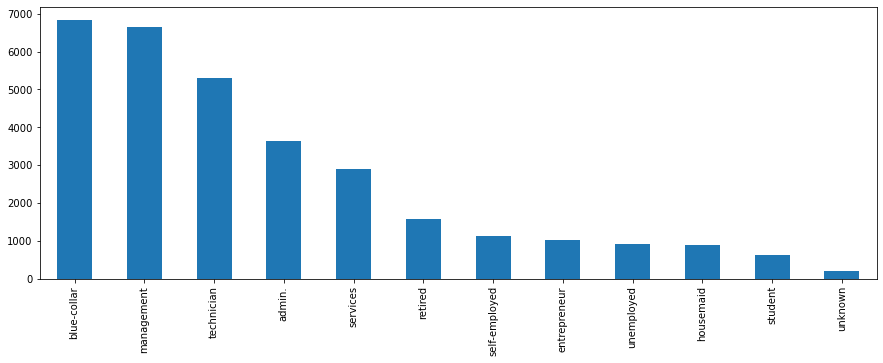

In [41]:
# 1st categorical column
train_df['job'].value_counts().plot(kind='bar', figsize=(15,5));

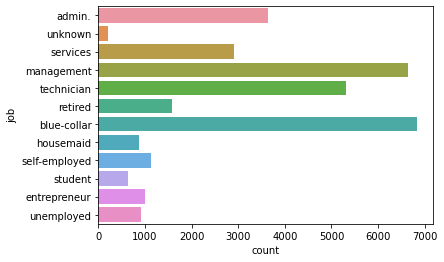

In [45]:
sns.countplot(data=train_df, y='job');

From the above plots we can see that most of the people belong to blue-collar job and next is management people, where as the least group of people 
are students,self-employed ,housemaid, who cannot afford for term deposits mostly

In [46]:
# 2nd categorical column
train_df['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

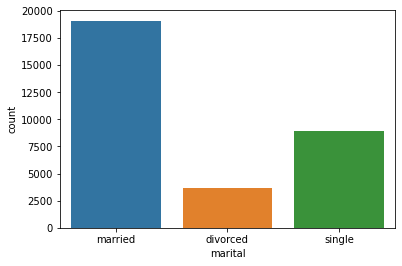

In [49]:
sns.countplot(data=train_df, x='marital')

<AxesSubplot:xlabel='marital', ylabel='count'>

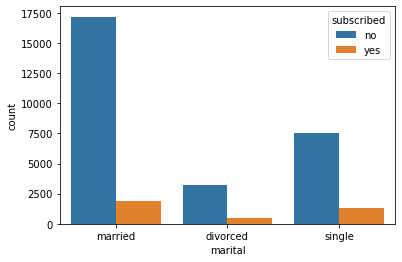

In [50]:
sns.countplot(data=train_df, x='marital',hue='subscribed')

From the above observation we can see that married group of people have high count of:19095 and the lowest count is for divorced

In [51]:
# 3rd categorical column
train_df['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

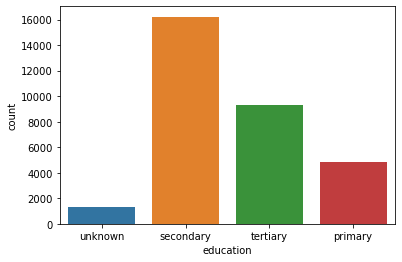

In [52]:
sns.countplot(data=train_df, x='education')

<AxesSubplot:xlabel='education', ylabel='count'>

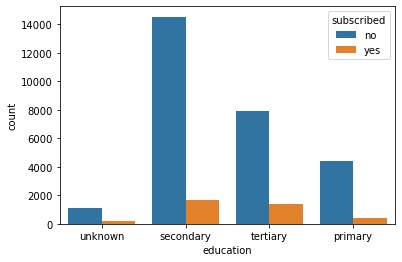

In [53]:
sns.countplot(data=train_df, x='education',hue='subscribed')

From the above observation we can see that the people with secondary eductaion have highest count of:16224 , which also has high number of subscription
    for term deposits

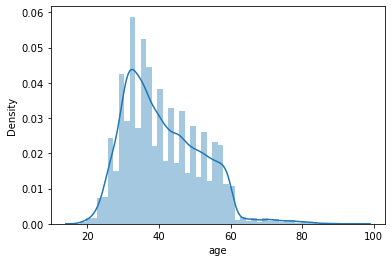

In [55]:
sns.distplot(train_df['age']);

From the above observation , it can be seen that majority people are in the age group of 20 to 60

# Bivariate Analysis

In [67]:
# 1)w.r.t the target column---- comparison with job and target
print(pd.crosstab(train_df['job'],train_df['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


<AxesSubplot:xlabel='count', ylabel='job'>

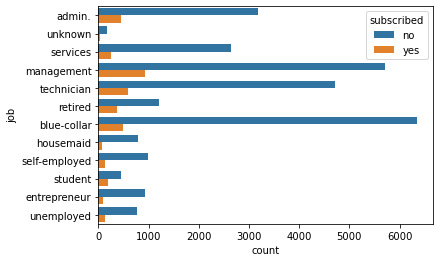

In [60]:
sns.countplot(data=train_df, y='job',hue='subscribed')

From the above observation we can see that blue-collar and management people have higher subscriptions for term deposits where as the
housemaids and students usually do not prefer for the term deposits

In [62]:
#2) marital with subscription
pd.crosstab(train_df['marital'], train_df['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


<AxesSubplot:xlabel='marital', ylabel='count'>

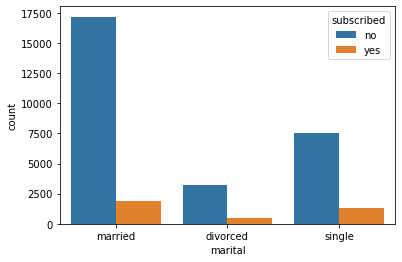

In [64]:
sns.countplot(data=train_df, x='marital',hue='subscribed')

From the above observation we can see that the married group of people have highest subscription :1919 , where as the divorced have lowest
    subscriptions of :445

In [65]:
train_df.sample(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
12100,14262,49,management,married,tertiary,no,176,yes,yes,cellular,14,jul,102,2,-1,0,unknown,no
20337,30040,53,entrepreneur,married,secondary,no,230,yes,no,cellular,4,feb,56,2,250,1,other,no
13786,36879,33,blue-collar,married,secondary,no,2279,yes,no,telephone,12,may,123,3,-1,0,unknown,no
5929,23828,32,technician,single,secondary,yes,-1,no,no,cellular,29,aug,185,2,-1,0,unknown,no
16371,21198,32,management,single,secondary,no,1473,no,no,cellular,14,aug,253,7,-1,0,unknown,no


In [69]:
#3)default with subscription
pd.crosstab(train_df['default'], train_df['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


<AxesSubplot:xlabel='default', ylabel='count'>

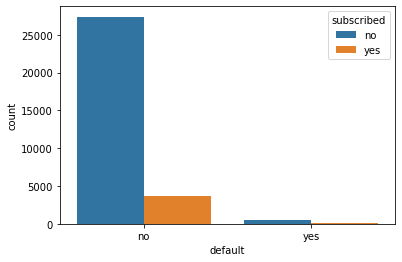

In [71]:
sns.countplot(data=train_df, x='default',hue='subscribed')

From the above observation we can see that the default to credit have less subscrptions to term deposits

# Converting the target variables to 0 and 1

In [73]:
#Converting the target variables to 0 and 1
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
train_df['subscribed']=LE.fit_transform(train_df['subscribed'])
train_df.subscribed.value_counts()


0    27932
1     3715
Name: subscribed, dtype: int64

In [74]:
LE.inverse_transform([0,1])

array(['no', 'yes'], dtype=object)

In [75]:
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,0


# Checking Correlation

In [76]:
train_df.corr()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


In [77]:
corr_mat=train_df.corr()

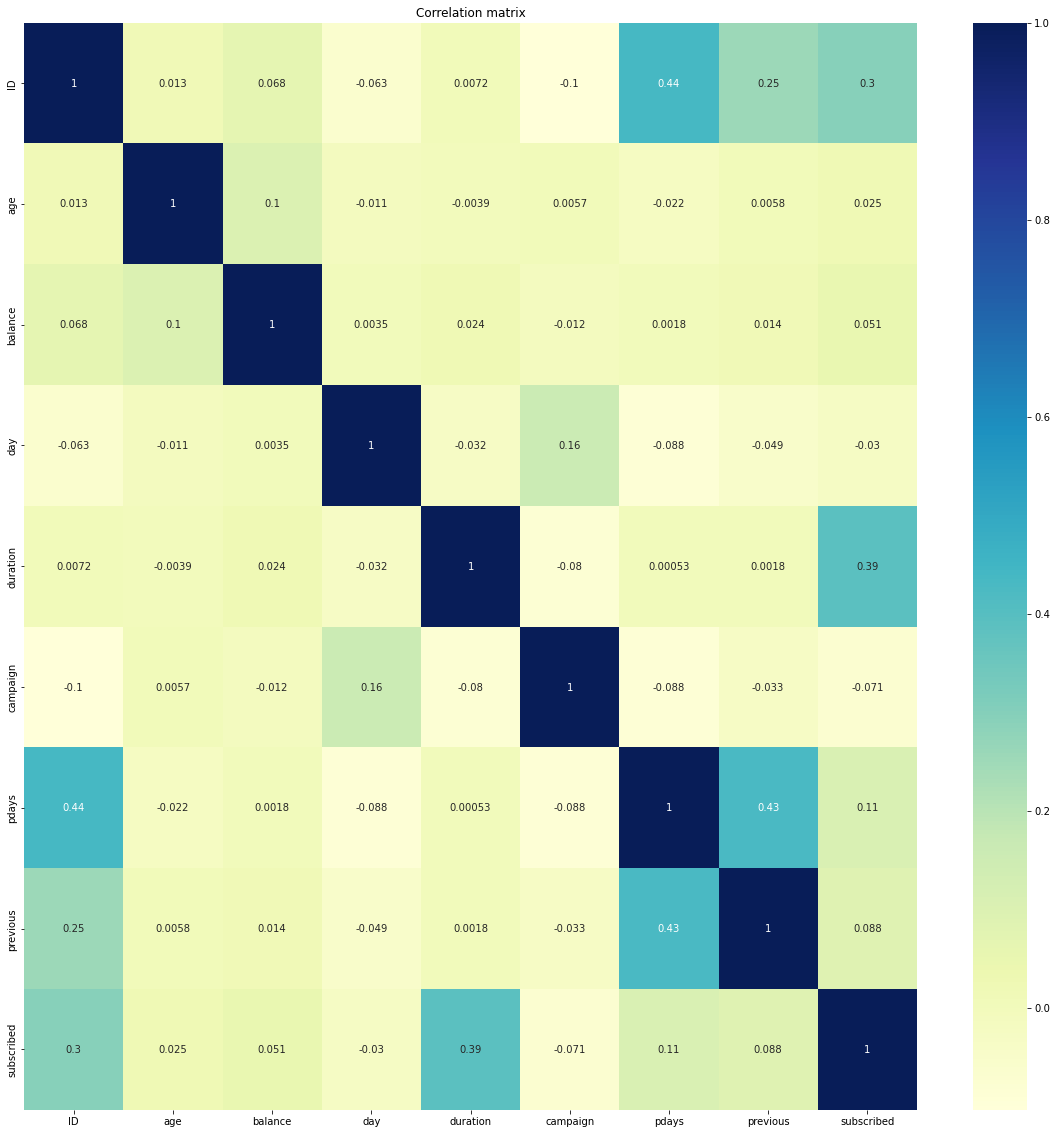

In [82]:
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True,cmap='YlGnBu')
plt.title("Correlation matrix")
plt.show()

From the above observation we can see that there is no multicolinearity present , as all the values lie within the range of < 0.7
also [duration of the call is highly correlated with the target variable], which means that , the longer the duration of call , it means, the person is interested in term deposit

In [83]:
# check the correlation with the target variable
corr_mat=train_df.corr()
corr_mat['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.389838
ID            0.296663
pdays         0.108290
previous      0.088081
balance       0.050807
age           0.024538
day          -0.029600
campaign     -0.070607
Name: subscribed, dtype: float64

From the above observation,we can see that  all the values lie within the range of < 0.7, hence no multicolinearity present

# Skweness

In [84]:
#data processing---splitting the independent and target variables in x and y 
x=train_df.drop('subscribed',axis=1)
y=train_df['subscribed']

In [85]:
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure


In [86]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int32

#checking skewness only for feature columns
As the data in most of the columns is categorical in nature , we do not find the skewness


In [87]:
#data processing---splitting the independent and target variables in x and y and model building
x=train_df.drop('subscribed',axis=1)
y=train_df['subscribed']

In [105]:
#Encoding of Dataframe
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in train_df.columns:
    if train_df[i].dtypes=="object":
        train_df[i]=enc.fit_transform(train_df[i].values.reshape(-1,1))

In [99]:
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0
1,40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0
2,15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0
3,43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1
4,29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0
31643,40178,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1
31644,19710,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0
31645,38556,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0


In [106]:
#Encoding of Dataframe-------test_df
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in test_df.columns:
    if test_df[i].dtypes=="object":
        test_df[i]=enc.fit_transform(test_df[i].values.reshape(-1,1))

In [107]:
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,11743,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,28292,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0
13562,45163,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0


Now our data is ready and now we can  build our model and check its performance.
Since it's a classification problem, we shal use Logistic Regression model for this problem.

In this project , we have been provided with 2 files 
1)train.csv : Use this dataset to train the model. 
This file contains all the client and call details as well as the target variable “subscribed”.
You have to train your model using this file.

2) test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

In [108]:
#data processing---splitting the independent and target variables in x and y and model building
x=train_df.drop('subscribed',axis=1)
y=train_df['subscribed']

In [109]:
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0
1,40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0
2,15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0
3,43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0
4,29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0
31643,40178,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0
31644,19710,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0
31645,38556,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0


In [110]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int32

In [103]:
#Finding the best random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [111]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    predrf=dt.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('Testing accuracy',acc,'random-state',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
        print('max-accuracy',maxAccu,'max-random-state',i)
        print("Best accuracy is ",maxAccu,"on random-state",maxRs)

Testing accuracy 0.8826224328593997 random-state 1
max-accuracy 0.8826224328593997 max-random-state 1
Best accuracy is  0.8826224328593997 on random-state 1
Testing accuracy 0.8846761453396524 random-state 2
max-accuracy 0.8846761453396524 max-random-state 2
Best accuracy is  0.8846761453396524 on random-state 2
Testing accuracy 0.8859399684044234 random-state 3
max-accuracy 0.8859399684044234 max-random-state 3
Best accuracy is  0.8859399684044234 on random-state 3
Testing accuracy 0.8868878357030016 random-state 4
max-accuracy 0.8868878357030016 max-random-state 4
Best accuracy is  0.8868878357030016 on random-state 4
Testing accuracy 0.8897314375987362 random-state 5
max-accuracy 0.8897314375987362 max-random-state 5
Best accuracy is  0.8897314375987362 on random-state 5
Testing accuracy 0.8808846761453396 random-state 6
Testing accuracy 0.8894154818325435 random-state 7
Testing accuracy 0.8872037914691943 random-state 8
Testing accuracy 0.889257503949447 random-state 9
Testing accu

In [112]:
#creating train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=46)

In [113]:
x_train.shape

(25317, 17)

In [114]:
x_test.shape

(6330, 17)

In [115]:
y_train.shape

(25317,)

In [116]:
y_test.shape

(6330,)

# Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 89.16271721958925
[[5489  122]
 [ 564  155]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5611
           1       0.56      0.22      0.31       719

    accuracy                           0.89      6330
   macro avg       0.73      0.60      0.63      6330
weighted avg       0.87      0.89      0.87      6330



From the above observation , it can be seen that, the accuracy obtained is :89.1627
The confusion matrix shows false positive and false negative values as : 112 and 564
The classification report shows the precision of (0) as :0.91 and of(1) as :0.56(average)

In [118]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
pred_train_dtc=dt.predict(x_train)
print("Testing Accuracy",accuracy_score(y_test,preddt)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_dtc)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Testing Accuracy 89.90521327014218
Training Accuracy 100.0
[[5294  317]
 [ 322  397]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5611
           1       0.56      0.55      0.55       719

    accuracy                           0.90      6330
   macro avg       0.75      0.75      0.75      6330
weighted avg       0.90      0.90      0.90      6330



From the above observation , it can be seen that, the accuracy obtained is :89.90521327014218 
The confusion matrix shows false positive and false negative values as : 317 and 322 
The classification report shows the precision of (0) as :0.94 and of(1) as :0.56(average)

In [119]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 91.70616113744076
[[5418  193]
 [ 332  387]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5611
           1       0.67      0.54      0.60       719

    accuracy                           0.92      6330
   macro avg       0.80      0.75      0.77      6330
weighted avg       0.91      0.92      0.91      6330



From the above observation , it can be seen that, the accuracy obtained is :91.70616113744076 
The confusion matrix shows false positive and false negative values as : 193 and 332 
The classification report shows the precision of (0) as :0.94 and of(1) as :0.67(average) , which is giving the good results in comprassion to the above

In [121]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cr_1=cross_val_score(LR,x,y,cv=5)
print("Cross validation for Logistic Regression is :",cr_1.mean())

Cross validation for Logistic Regression is : 0.8874141574042804


In [122]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cr_2=cross_val_score(dt,x,y,cv=5)
print("Cross validation for Decision Tree model is :",cr_2.mean())

Cross validation for Decision Tree model is : 0.8874142822090544


In [123]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cr_3=cross_val_score(rf,x,y,cv=5)
print("Cross validation for Random Forest is :",cr_3.mean())

Cross validation for Random Forest is : 0.9115239636398762


From the above results of cross validation , 
random forest gives the best result :0.9115239636398762

# make the prediction on test dataset

In [124]:
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,11743,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,28292,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0
13562,45163,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0


In [130]:
test_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0


In [132]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(test_df)

preddt

array([0, 0, 1, ..., 0, 1, 0])

In [133]:
x_train.shape

(25317, 17)

In [134]:
test_df.shape

(13564, 17)

In [135]:
Final_result_subscriptions=pd.DataFrame()

In [137]:
Final_result_subscriptions['ID']=test_df['ID']
Final_result_subscriptions['Subscribed']=preddt

In [138]:
Final_result_subscriptions

,ID,Subscribed
0,38441,0
1,40403,0
2,3709,1
3,37422,0
4,12527,0
...,...,...
13559,23465,0
13560,11743,0
13561,28292,0
13562,45163,1


In [140]:
#We shall convert in the form of yes/no
Final_result_subscriptions['Subscribed'].replace(0,'no',inplace=True)
Final_result_subscriptions['Subscribed'].replace(1,'yes',inplace=True)

In [141]:
Final_result_subscriptions

,ID,Subscribed
0,38441,no
1,40403,no
2,3709,yes
3,37422,no
4,12527,no
...,...,...
13559,23465,no
13560,11743,no
13561,28292,no
13562,45163,yes


In [ ]:
The Final result with the  test.csv file, has been saved in